# physical setup


## basic  setup

In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


to view all the paramters:

In [3]:
my_jet.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [4]:
my_jet.parameters.par_table

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,object,bool,bool
N,electron_density,1 / cm3,100.0,0.0,None,False,False
gmin,low-energy-cut-off,lorentz-factor*,2.0,1.0,1000000000.0,False,False
gmax,high-energy-cut-off,lorentz-factor*,1000000.0,1.0,1000000000000000.0,False,False
s,LE_spectral_slope,,2.0,-10.0,10.0,False,False
r,spectral_curvature,,0.4,-15.0,15.0,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,10000.0,1.0,1000000000.0,False,False
R,region_size,cm,5000000000000000.0,1000.0,1e+30,False,False
R_H,region_position,cm,1e+17,0.0,None,False,True
B,magnetic_field,G,0.1,0.0,None,False,False


In [5]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- -

## setting the parameters

In [6]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [7]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## investigating the electron distribution

In [8]:
my_jet.show_electron_distribution()

-------------------------------------------------------------------------------------------------------------------
electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               B      magnetic_field               G                0.2              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
               R         region_size              cm 1000000000000000.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False  

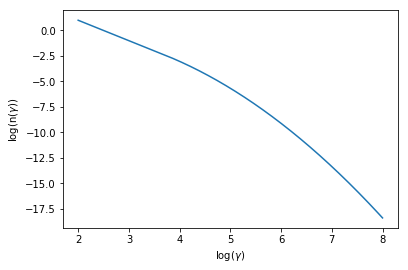

In [9]:
p=my_jet.electron_distribution.plot()

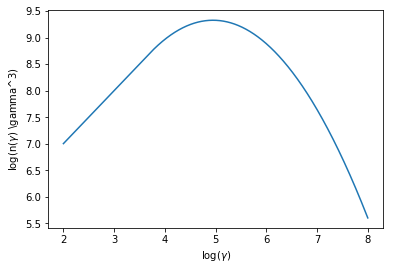

In [10]:
p=my_jet.electron_distribution.plot3p()

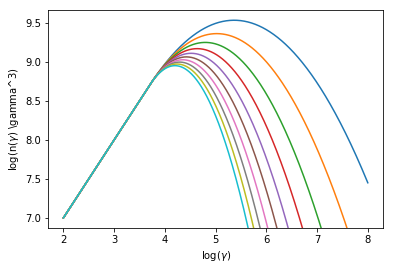

In [11]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

###  using log values for electron distribution parameters

In [12]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ----

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [13]:
my_jet.eval()

In [14]:
my_jet.show_pars()

      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3              100.0              0.0             None False  False
            gmin  low-energy-cut-off lorentz-factor* 0.3010299956639812              0.0              9.0  True  False
            gmax high-energy-cut-off lorentz-factor*                6.0              0.0             15.0  True  False
               s   LE_spectral_slope                                2.0            -10.0             10.0 False  False
               r  spectral_curvature                                0.4            -15.0             15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*                4.0              0.0              9.0  True  False
               R         region_size            

and plot the corresponding SED:


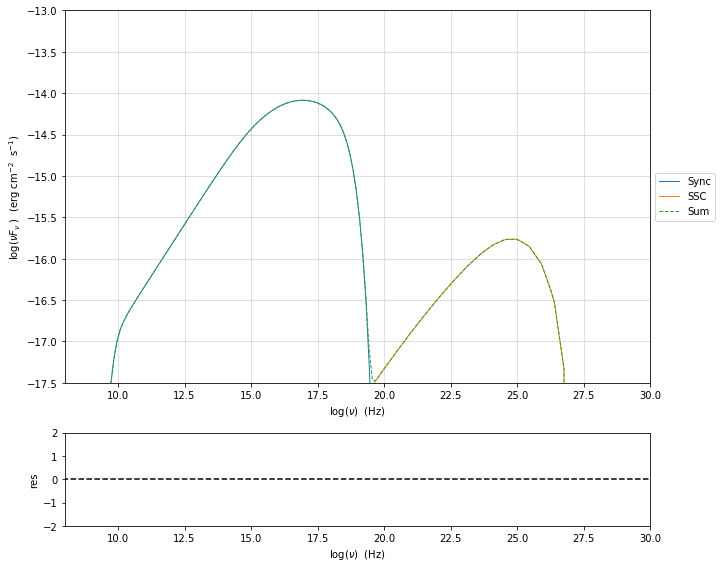

In [15]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

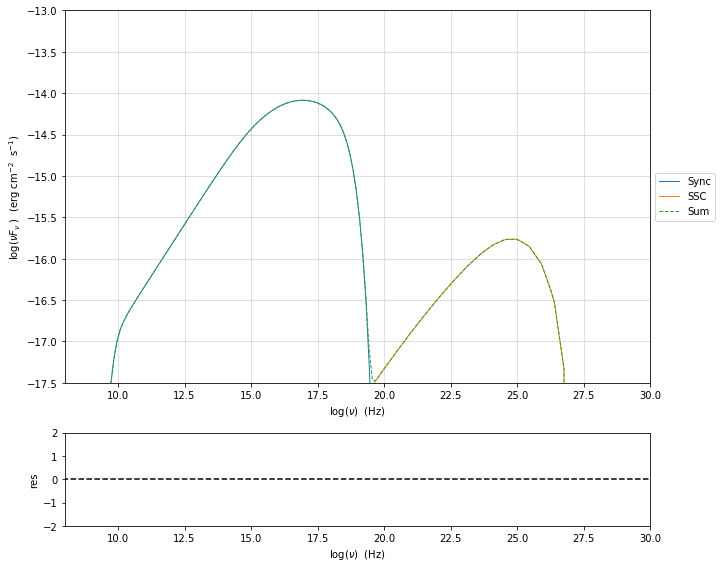

In [16]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [17]:
my_jet.set_IC_nu_size(100)

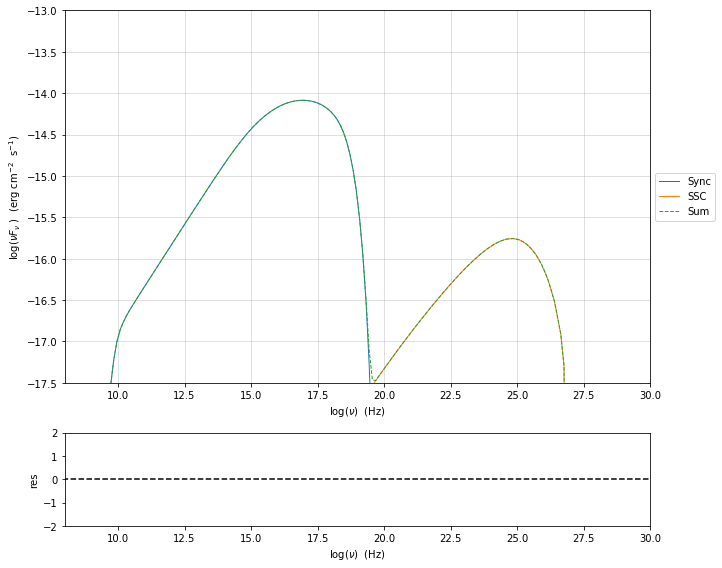

In [18]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the istropic luminosity,
by simply passing the ``frame`` kw to ``src``

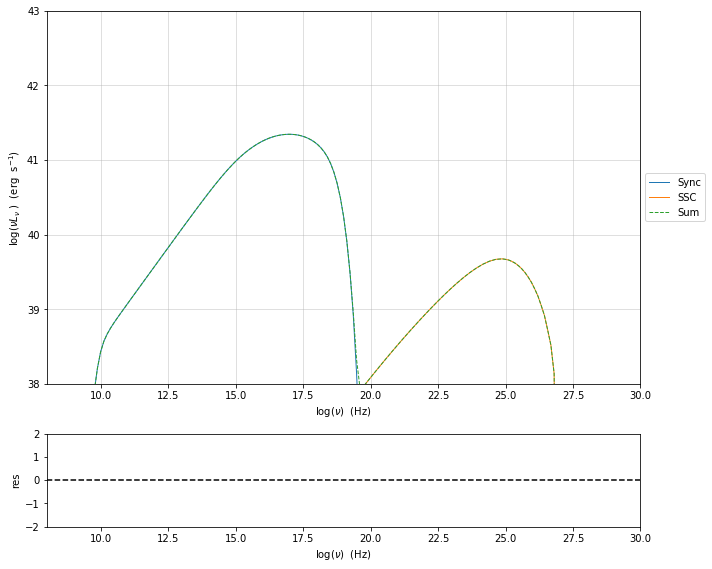

In [19]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

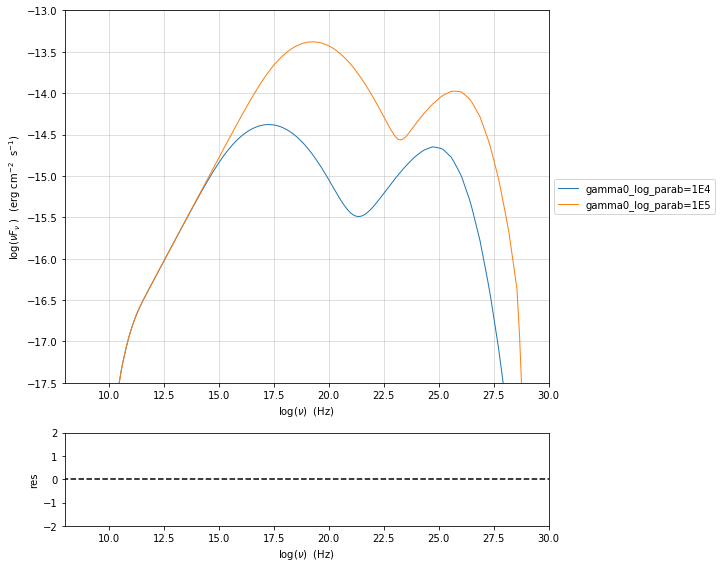

In [20]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## saving a plot

to save the plot

In [21]:
my_plot.save('jet1.png')

## saving and loading  a model

In [22]:
my_jet.save_model('test_model.dat')

In [23]:
my_jet_new=Jet.load_model('test_model.dat')

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 316227766016837.94           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False   True
               B      magnetic_field               G                0.2              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               10.0           0.0001               None False  False
          z_cosm            redshift                                0.1              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
            gmin  low-energy-cut

## switching on/off the particle distribution normalization

In [24]:
my_jet.Norm_distr

1

and then you can switch off the normalization withe command

In [25]:
my_jet.switch_Norm_distr_OFF()

OR

In [26]:
my_jet.Norm_distr=0

or set back the normalization on with

In [27]:
my_jet.switch_Norm_distr_ON()

OR

In [28]:
my_jet.Norm_distr=1

## setting the particle density  from observed Fluxes or Luminosities

In [29]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [30]:
my_jet.parameters.N.val

100.0

In [31]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [32]:
my_jet.get_par_by_name('N').val

271.77338679726074

In [33]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3 271.77338679726074              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

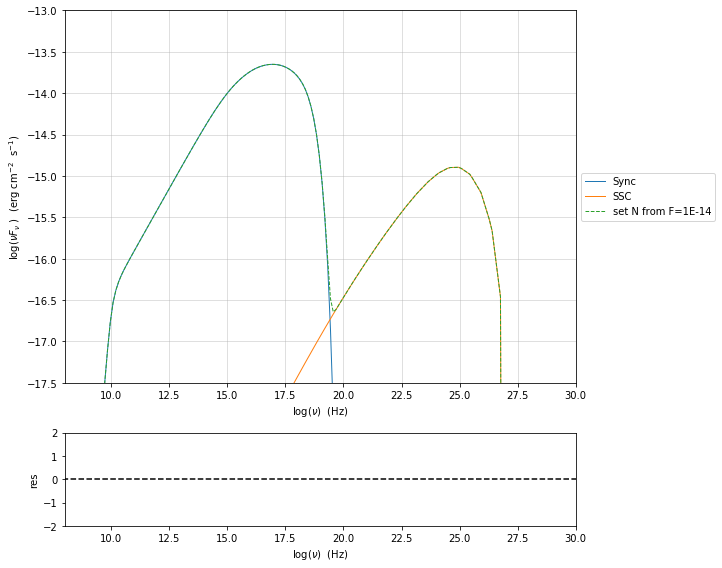

In [34]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [35]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

In [36]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [37]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [38]:
my_jet.get_beaming()

19.943844732554165

In [39]:
my_jet.set_par('theta',val=10.)

In [40]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [41]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [42]:
my_jet.parameters.show_pars()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

## accessing individual spectral components

It is possible to access specific spectral components of our model

In [43]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [44]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [45]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [46]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [47]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [48]:
print (nuFnu_sync[::10])

[1.00000000e-120 1.00000000e-120 1.08448642e-022 1.71738565e-018
 4.07807919e-016 1.63686337e-015 6.48484725e-015 2.46700674e-014
 7.28812086e-014 1.24298363e-013 1.12162549e-013 1.42017250e-014
 4.14261886e-028 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120] erg / (cm2 s)


In [49]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [50]:
print (nuLnu_sync_src[::10])

[2.70118406e-65 2.70118406e-65 2.92939742e+33 4.63897473e+37
 1.10156425e+40 4.42146923e+40 1.75167660e+41 6.66383927e+41
 1.96865559e+42 3.35752756e+42 3.02971688e+42 3.83614730e+41
 1.11899760e+28 2.70118406e-65 2.70118406e-65 2.70118406e-65
 2.70118406e-65 2.70118406e-65 2.70118406e-65 2.70118406e-65] erg / s


In [51]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [52]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
15848931.924611142,1e-120,1e-120,1e-120
251188643.1509582,1.0844864302391386e-22,1.0844864159585182e-22,1.4280620238888498e-30
3981071705.5349693,1.7173856696253947e-18,1.7173856494785146e-18,2.0146879965841637e-26
63095734448.019424,4.078079552134786e-16,4.0780791901432327e-16,3.6199155354751893e-23
1000000000000.0,1.6368645001464381e-15,1.6368633684904028e-15,1.1316560354507247e-21
15848931924611.11,6.484856227306914e-15,6.484847252386628e-15,8.974920286013819e-21
251188643150958.22,2.467012104235855e-14,2.4670067379508708e-14,5.366284984149398e-20


In [53]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [54]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,2.7011840560827467e-65,2.7011840560827467e-65,2.7011840560827467e-65
17433825.11707226,2.7011840560827467e-65,2.7011840560827467e-65,2.7011840560827467e-65
276307507.4660541,2.929397454400055e+33,2.929397415825471e+33,3.8574583700258197e+25
4379178876.088467,4.638974788937108e+37,4.638974734516677e+37,5.442043094354434e+29
69405307892.82137,1.1015643465663552e+40,1.101564248785774e+40,9.77805812879182e+32
1100000000000.0,4.421472289763414e+40,4.421469232952174e+40,3.056811239929309e+34
17433825117072.223,1.751679024719035e+41,1.7516766004278765e+41,2.424291158119413e+35
276307507466054.06,6.663853762125038e+41,6.663839266801599e+41,1.449532343958061e+36


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [55]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [1.68594648e-62, 1.68594648e-62, 1.82838606e+36, 2.89542029e+40,
           6.87542325e+42, 2.75966403e+43, 1.09331054e+44, 4.15924133e+44,
           1.22873817e+45, 2.09560387e+45, 1.89100054e+45, 2.39433482e+44,
           6.98423368e+30, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62,
           1.68594648e-62, 1.68594648e-62, 1.68594648e-62, 1.68594648e-62] GeV / s>

the table can be easily saved as an ascii file

In [56]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite='True')

or in fits format

In [57]:
t_src.write('test_SED.fits',format='fits',overwrite='True')

## Energetic report

It is possible to get an energetic report of the jet model (updated each time that you eval the model).
This report gives energy densities (`U_`) (both in the blob end disk restframe), the luminosities of the emitted
components in the blob resftrame (`L_`), and the luminosity carried by the jet (`jet_L`) for the radiative 
components, the electrons, the magnetic fields, and for the cold protons in the jet.

In [58]:
my_jet.energetic_report()

-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                  type               units            val          
------------- ----------------------------- --------- ----------------------
          U_e Energy dens. blob rest. frame erg / cm3  0.0017404342430246782
          U_p Energy dens. blob rest. frame erg / cm3         0.015032764261
          U_B Energy dens. blob rest. frame erg / cm3 0.00039788735772973844
      U_Synch Energy dens. blob rest. frame erg / cm3  5.506769532122052e-05
  U_Synch_DRF Energy dens. disk rest. frame erg / cm3      8.712292317747346
       U_Disk Energy dens. blob rest. frame erg / cm3                    0.0
        U_BLR Energy dens. blob rest. frame erg / cm3                    0.0
         U_DT Energy dens. blob rest. frame erg / cm3                    0.0
        U_CMB Energy dens. blob rest. frame erg / cm3                    0.0
   U_Disk_DRF Energy dens. disk rest. fr

If you want to evaluate the energetic report in non verbose mode:

In [59]:
my_jet.energetic_report(verbose=False)

In [60]:
my_jet.energetic_dict

{'U_e': 0.0017404342430246782,
 'U_p': 0.015032764261,
 'U_B': 0.00039788735772973844,
 'U_Synch': 5.506769532122052e-05,
 'U_Synch_DRF': 8.712292317747346,
 'U_Disk': 0.0,
 'U_BLR': 0.0,
 'U_DT': 0.0,
 'U_CMB': 0.0,
 'U_Disk_DRF': 0.0,
 'U_BLR_DRF': 0.0,
 'U_DT_DRF': 0.0,
 'U_CMB_DRF': 0.0,
 'L_Sync_rf': 1.728764352592126e+38,
 'L_SSC_rf': 3.82887909757934e+36,
 'L_EC_Disk_rf': 0.0,
 'L_EC_BLR_rf': 0.0,
 'L_EC_DT_rf': 0.0,
 'L_EC_CMB_rf': 0.0,
 'L_PP_rf': 0.0,
 'jet_L_Sync': 4.3219108814803147e+39,
 'jet_L_SSC': 9.572197743948349e+37,
 'jet_L_EC_Disk': 0.0,
 'jet_L_EC_BLR': 0.0,
 'jet_L_EC_DT': 0.0,
 'jet_L_EC_CMB': 0.0,
 'jet_L_PP': 0.0,
 'jet_L_rad': 4.417632858919798e+39,
 'jet_L_kin': 4.043042849486075e+42,
 'jet_L_tot': 4.047460482344995e+42,
 'jet_L_e': 4.097964612089291e+41,
 'jet_L_B': 9.368514312500004e+40,
 'jet_L_p': 3.539561245152146e+42}

In [61]:
my_jet.energetic_report_table

name,type,units,val
str13,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,0.0017404342430246782
U_p,Energy dens. blob rest. frame,erg / cm3,0.015032764261
U_B,Energy dens. blob rest. frame,erg / cm3,0.00039788735772973844
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.506769532122052e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,8.712292317747346
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.0
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.0
U_DT,Energy dens. blob rest. frame,erg / cm3,0.0
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.0
